<IPython.core.display.Javascript object>


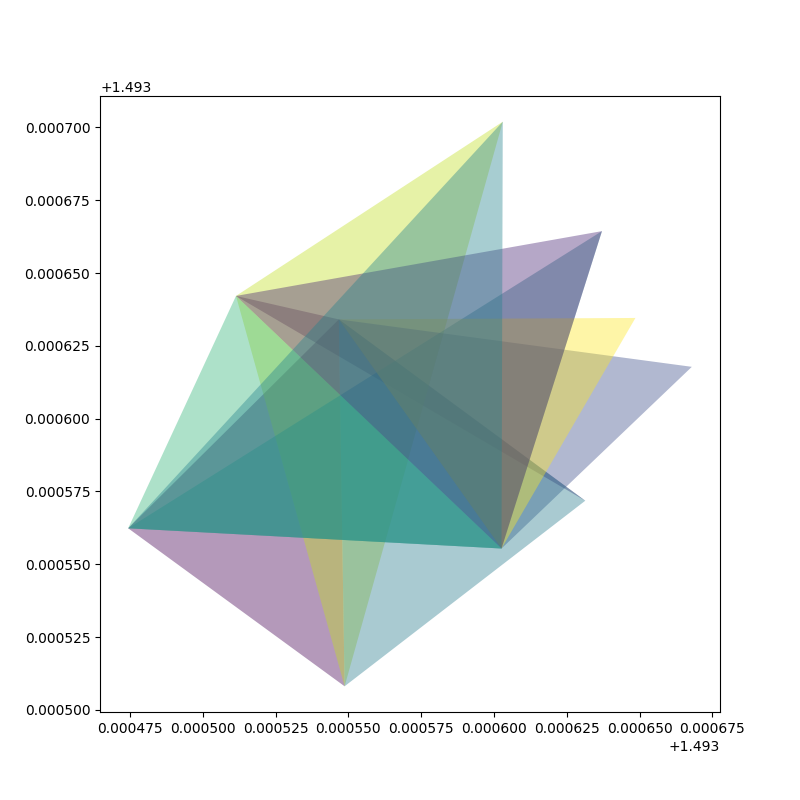

In [39]:
%matplotlib notebook

import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


# Number of points
N = 10

# How far they step each iteration
step = 0.1

pts = np.random.rand(N, 2)

choices = np.zeros((N, 3), dtype=np.int)
for i in range(N):
    cs = np.random.choice(N-1, 2, replace=False)
    choices[i] = [i] + [c + 1 if c >= i else c for c in cs]

# Matrix for rotating 90 degrees and scaling by \sqrt{3}/2
R = np.sqrt(3)/2. * np.array([[0,1],[-1,0]])

# Find the third point of equilateral triangle nearest to a third point
def eq_tri(pts, cur):
    av = np.average(pts, axis=1)
    diff = pts[1] - pts[0]
    return av + np.dot(R, diff) * np.sign(np.cross(diff, pts[0] - cur))

# Make everyone move towards their nearest equilateral triangle
def update_pts():
    new_pts = copy.copy(pts)
    for i in range(N):
        tri = pts[choices[i]]
        cur = tri[0]
        ideal = eq_tri(tri[1:3], cur)
        step = 0.1 + 0.1 * np.random.rand()
        new_pts[i] = cur + (ideal - cur) * step
    pts[:] = new_pts[:]

    
# Animation
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.set_aspect('equal', 'datalim')

colors = 200*np.random.rand(N)          

def animate(t):
    update_pts()
    patches = []
    ax.clear()
    for i in range(N):
        tri = pts[choices[i]]
        polygon = Polygon(tri, True)
        patches.append(polygon)
    p = PatchCollection(patches, alpha=0.4)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    ax.autoscale_view(True,True,True)

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), interval=25, blit=True)